In [3]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

file = "/content/drive/MyDrive/해커톤/녹음.wav"
# load audio file with Librosa
sig, sr = librosa.load(file, sr=22050)
#초당 샘플갯수 sr

print(sig,sig.shape)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.2620228e-05 7.7436991e-05
 0.0000000e+00] (197098,)


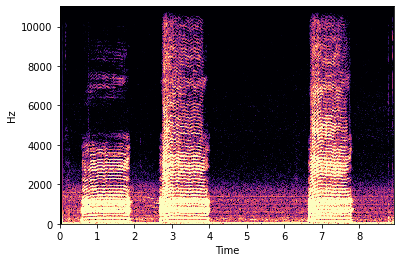

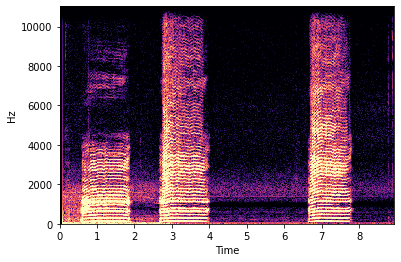

In [13]:
import scipy.signal as signal

mean, sigma = 0, 0.1 
time_s = 5
sine_freq = 1000
sig_amp = 0.0001
sample = sr * time_s


#normalize_function
min_level_db = -100
def _normalize(S):
    return np.clip((S-min_level_db)/(-min_level_db), 0, 1)

amplitude = np.abs(librosa.stft(sig, n_fft=1024, hop_length=512, win_length = 1024, window=signal.hann))
mag_db = librosa.amplitude_to_db(amplitude)
mag_n = _normalize(mag_db)
librosa.display.specshow(mag_n, y_axis='linear', x_axis='time')
plt.show()

#LMS 알고리즘 적용
lms_size = 16
step_size = 0.0025
N = len(sig)-lms_size+1

filter_w = np.zeros(lms_size) 
filterout_y = np.zeros(N)
err = np.zeros(N)
for n in range(N):
    x_in = sig[n:n+lms_size]
    filterout_y[n] = np.dot(x_in, filter_w.T)
    err[n] = sig[n + lms_size -1] - filterout_y[n]
    # 작거나 0인 값이 나오면 결과값이 이상하게 출력된다. 이를 방지하기 위해 10을 더해준다.
    sum_val = sum(x_in) + 10
    filter_w = filter_w + step_size * err[n] * (x_in / sum_val)

amplitude = np.abs(librosa.stft(err, n_fft=1024, hop_length=512, win_length = 1024, window=signal.hann))
mag_db = librosa.amplitude_to_db(amplitude)
mag_n = _normalize(mag_db)
librosa.display.specshow(mag_n, y_axis='linear', x_axis='time')
plt.show()

https://m.blog.naver.com/gaechuni/221656866612